### Airline Passenger Prediction using RNN - LSTM 

Watch Full Video: https://youtu.be/kgSWJMmvsxU

In [1]:
# !pip install tensorflow
# !pip install tensorflow-gpu

In [2]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset = pd.read_csv('passenger.csv')
dataset = dataset['Passengers']
dataset = np.array(dataset).reshape(-1,1)
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

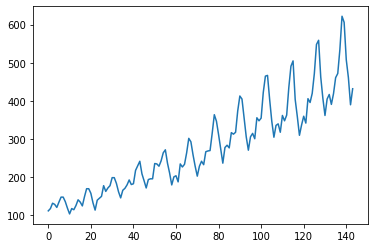

In [4]:
plt.plot(dataset)

In [5]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min()

0.0

In [6]:
train_size = 100
test_size = 44

In [7]:
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [8]:
test = dataset[train_size:144, :]
test.shape

(44, 1)

### build training and testing dataset 

In [9]:
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
look_back = 1
X_train, y_train = get_data(train, look_back)

In [11]:
X_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [12]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

In [13]:
X_test, y_test = get_data(test, look_back)

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
X_train.shape

(98, 1, 1)

### Build the model 

In [16]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Train on 98 samples
Epoch 1/50
98/98 [==============================] - 2s 22ms/sample - loss: 0.0337
Epoch 2/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0141
Epoch 3/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0122
Epoch 4/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0109
Epoch 5/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0097
Epoch 6/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0084
Epoch 7/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0073
Epoch 8/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0062
Epoch 9/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0053
Epoch 10/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0044
Epoch 11/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0038
Epoch 12/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0032
Epoc

In [19]:
y_pred = model.predict(X_test)

In [20]:
scaler.scale_

array([0.0019305])

In [21]:
y_pred = scaler.inverse_transform(y_pred)

In [22]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

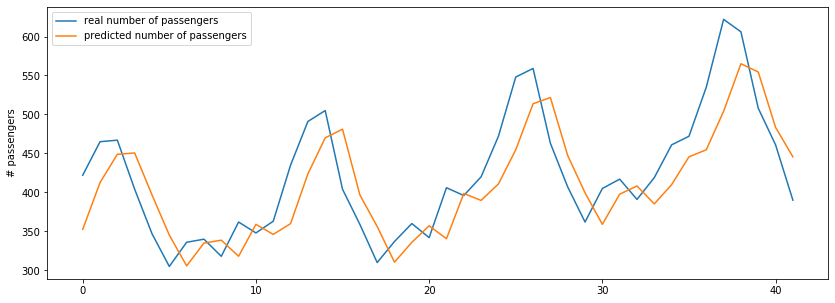

In [23]:
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [24]:
scaler.scale_

array([0.0019305])